# **CREDIT CARD FRAUD DETECTION**

1. Importing Libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


2. Loading Dataset

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


3. Data Exploration

In [6]:
# Check for missing values
print(df.isnull().sum())

# Check class distribution
print(df['Class'].value_counts(normalize=True))

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


4. Data Visualization

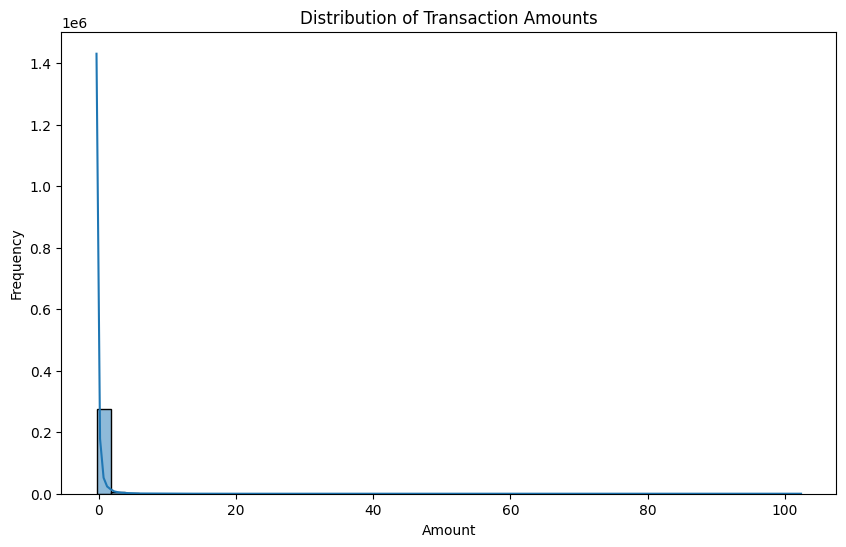

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


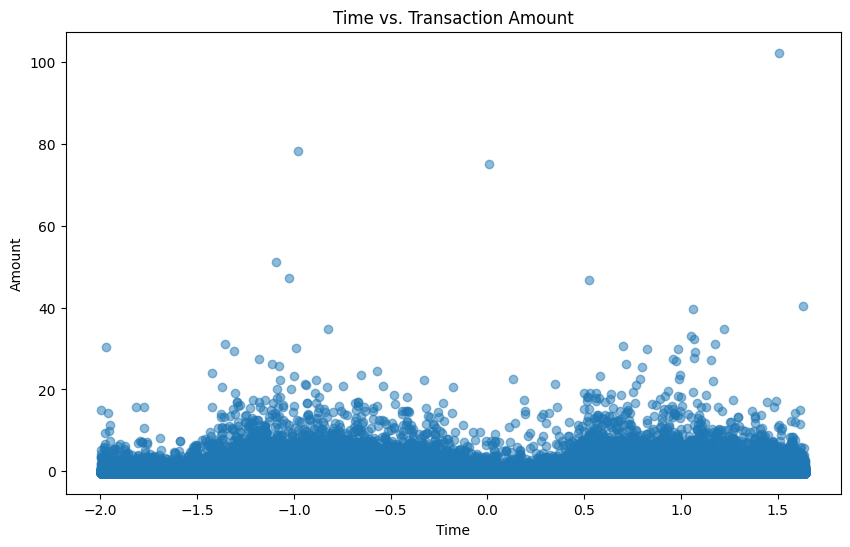

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Time'], df['Amount'], alpha=0.5)
plt.title('Time vs. Transaction Amount')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()


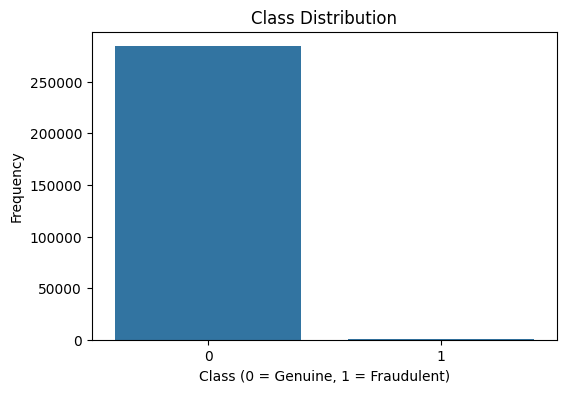

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class (0 = Genuine, 1 = Fraudulent)')
plt.ylabel('Frequency')
plt.show()


<ipython-input-19-27e9f396a09b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['V'+str(i)], label='Genuine', shade=True)
<ipython-input-19-27e9f396a09b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['V'+str(i)], label='Fraudulent', shade=True)


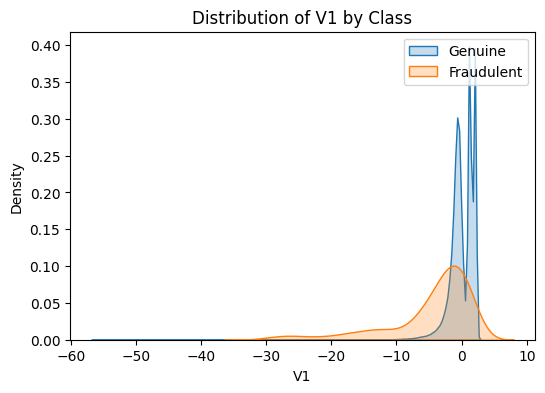

<ipython-input-19-27e9f396a09b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['V'+str(i)], label='Genuine', shade=True)
<ipython-input-19-27e9f396a09b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['V'+str(i)], label='Fraudulent', shade=True)


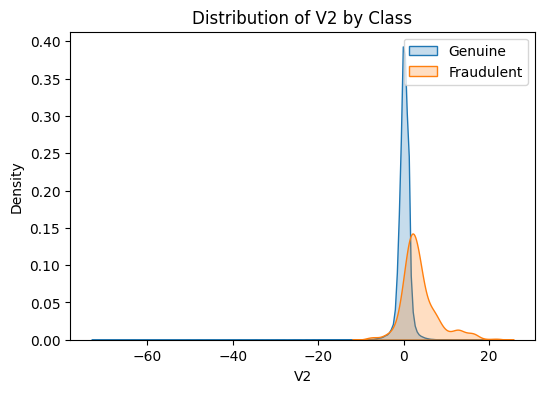

<ipython-input-19-27e9f396a09b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['V'+str(i)], label='Genuine', shade=True)
<ipython-input-19-27e9f396a09b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['V'+str(i)], label='Fraudulent', shade=True)


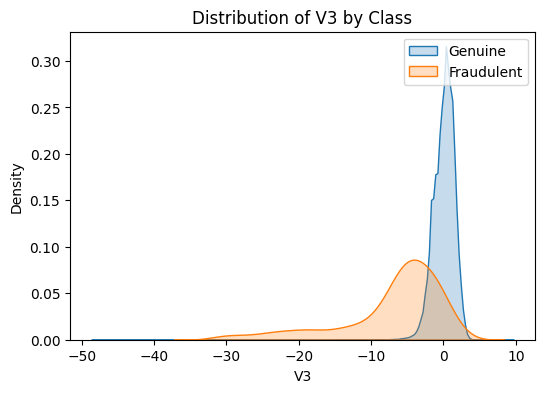

<ipython-input-19-27e9f396a09b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['V'+str(i)], label='Genuine', shade=True)
<ipython-input-19-27e9f396a09b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['V'+str(i)], label='Fraudulent', shade=True)


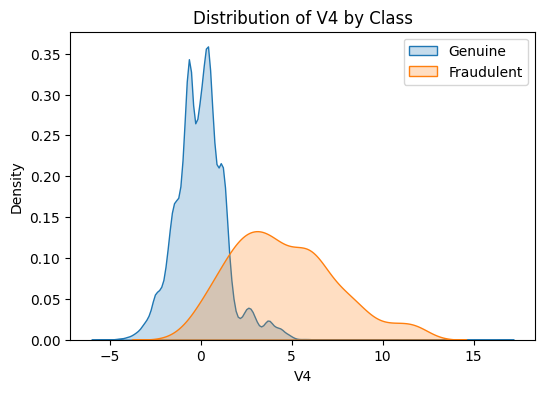

<ipython-input-19-27e9f396a09b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['V'+str(i)], label='Genuine', shade=True)
<ipython-input-19-27e9f396a09b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['V'+str(i)], label='Fraudulent', shade=True)


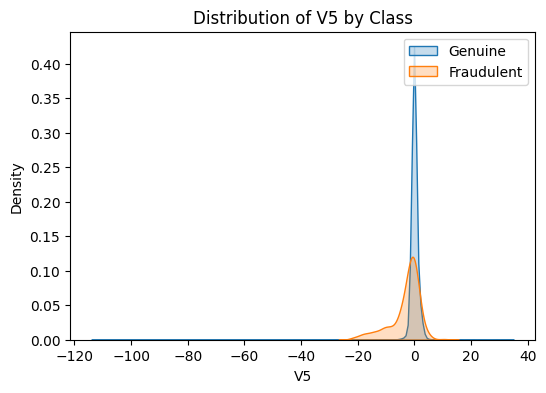

<ipython-input-19-27e9f396a09b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['V'+str(i)], label='Genuine', shade=True)
<ipython-input-19-27e9f396a09b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['V'+str(i)], label='Fraudulent', shade=True)


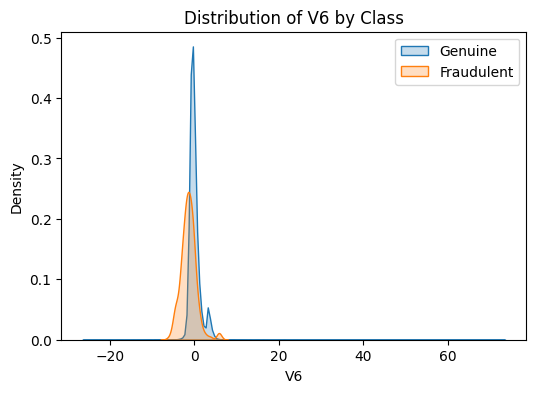

<ipython-input-19-27e9f396a09b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['V'+str(i)], label='Genuine', shade=True)
<ipython-input-19-27e9f396a09b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['V'+str(i)], label='Fraudulent', shade=True)


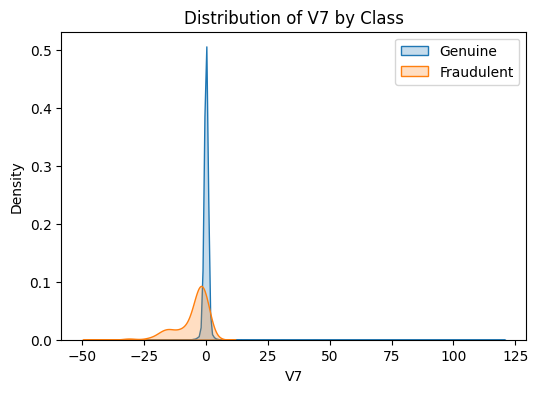

<ipython-input-19-27e9f396a09b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['V'+str(i)], label='Genuine', shade=True)
<ipython-input-19-27e9f396a09b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['V'+str(i)], label='Fraudulent', shade=True)


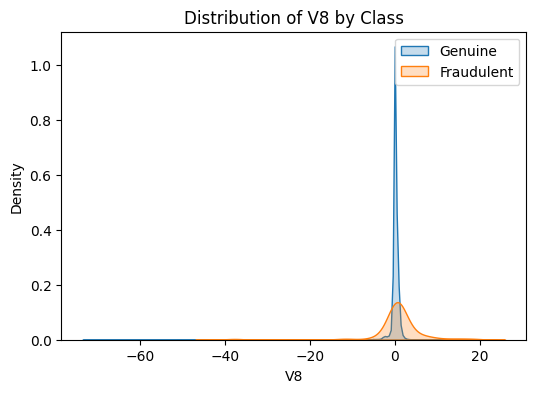

<ipython-input-19-27e9f396a09b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['V'+str(i)], label='Genuine', shade=True)
<ipython-input-19-27e9f396a09b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['V'+str(i)], label='Fraudulent', shade=True)


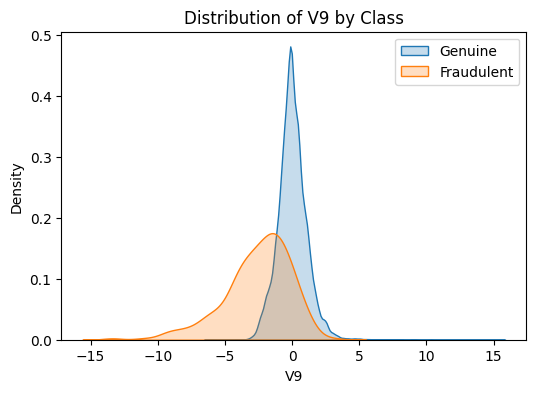

<ipython-input-19-27e9f396a09b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['V'+str(i)], label='Genuine', shade=True)
<ipython-input-19-27e9f396a09b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['V'+str(i)], label='Fraudulent', shade=True)


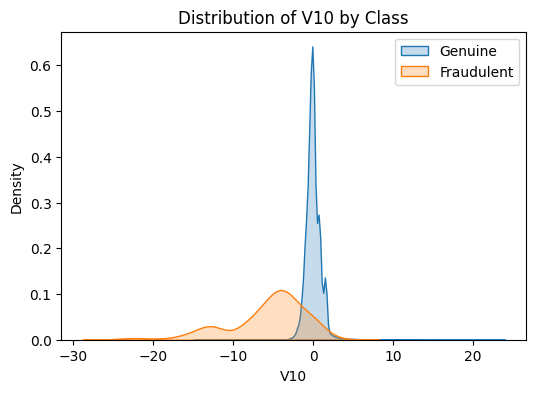

<ipython-input-19-27e9f396a09b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['V'+str(i)], label='Genuine', shade=True)
<ipython-input-19-27e9f396a09b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['V'+str(i)], label='Fraudulent', shade=True)


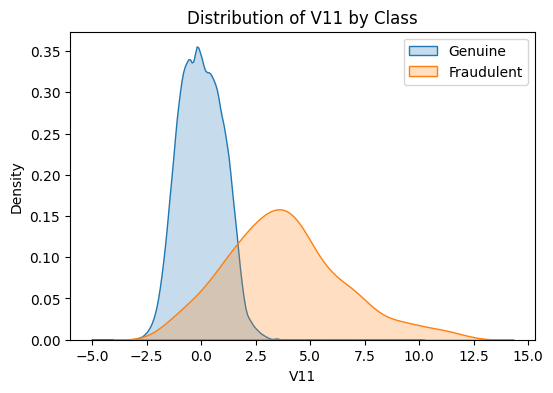

<ipython-input-19-27e9f396a09b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['V'+str(i)], label='Genuine', shade=True)
<ipython-input-19-27e9f396a09b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['V'+str(i)], label='Fraudulent', shade=True)


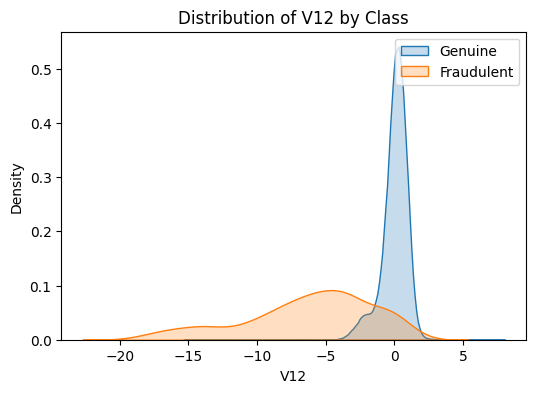

<ipython-input-19-27e9f396a09b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['V'+str(i)], label='Genuine', shade=True)
<ipython-input-19-27e9f396a09b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['V'+str(i)], label='Fraudulent', shade=True)


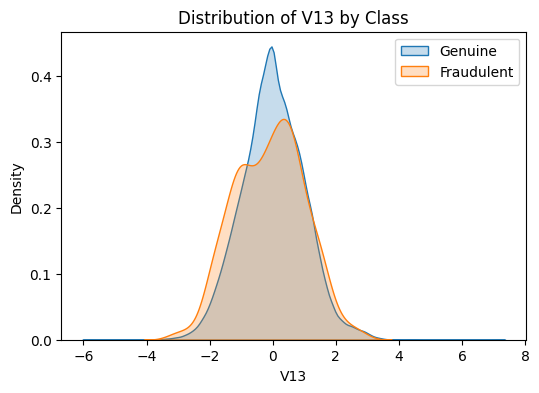

<ipython-input-19-27e9f396a09b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['V'+str(i)], label='Genuine', shade=True)
<ipython-input-19-27e9f396a09b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['V'+str(i)], label='Fraudulent', shade=True)


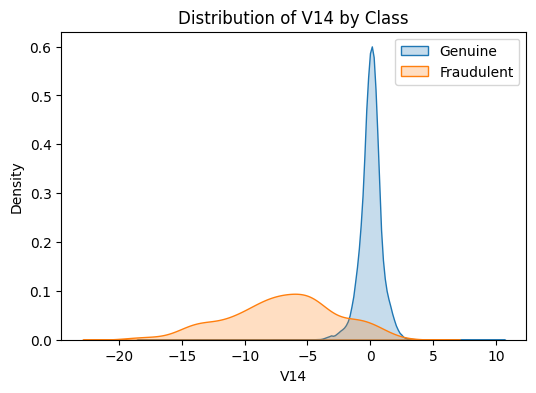

<ipython-input-19-27e9f396a09b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['V'+str(i)], label='Genuine', shade=True)
<ipython-input-19-27e9f396a09b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['V'+str(i)], label='Fraudulent', shade=True)


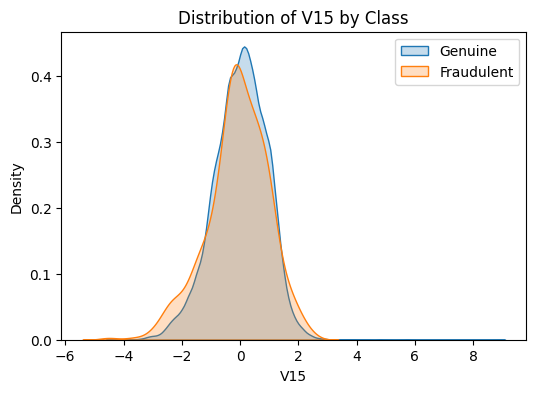

<ipython-input-19-27e9f396a09b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['V'+str(i)], label='Genuine', shade=True)
<ipython-input-19-27e9f396a09b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['V'+str(i)], label='Fraudulent', shade=True)


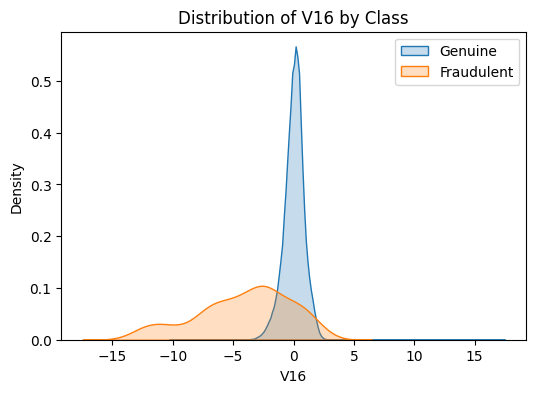

<ipython-input-19-27e9f396a09b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['V'+str(i)], label='Genuine', shade=True)
<ipython-input-19-27e9f396a09b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['V'+str(i)], label='Fraudulent', shade=True)


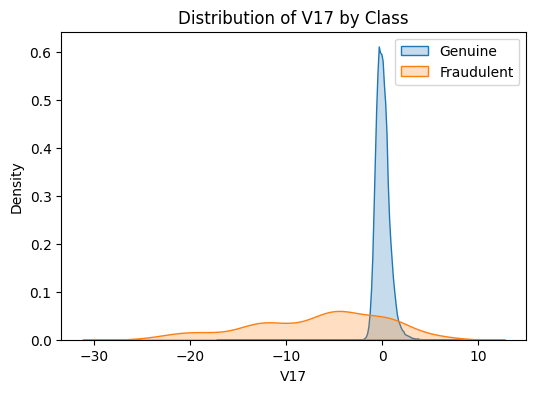

<ipython-input-19-27e9f396a09b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['V'+str(i)], label='Genuine', shade=True)
<ipython-input-19-27e9f396a09b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['V'+str(i)], label='Fraudulent', shade=True)


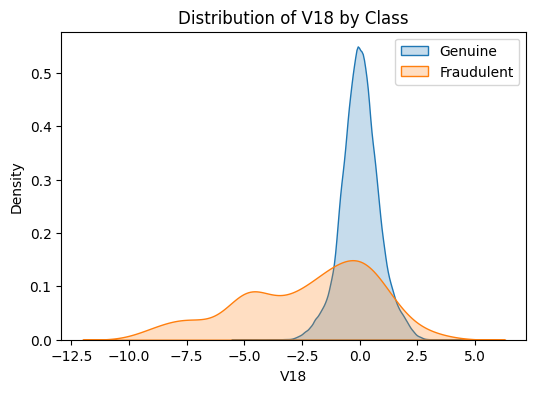

<ipython-input-19-27e9f396a09b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['V'+str(i)], label='Genuine', shade=True)
<ipython-input-19-27e9f396a09b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['V'+str(i)], label='Fraudulent', shade=True)


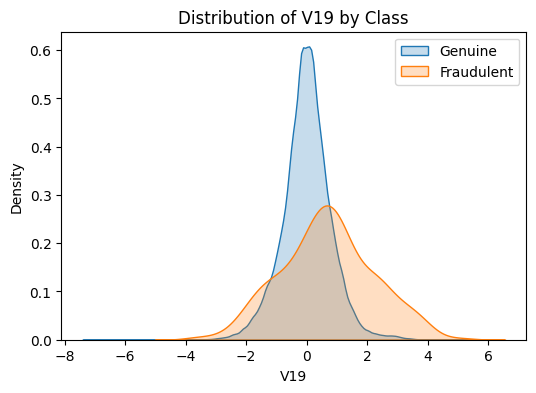

<ipython-input-19-27e9f396a09b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['V'+str(i)], label='Genuine', shade=True)
<ipython-input-19-27e9f396a09b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['V'+str(i)], label='Fraudulent', shade=True)


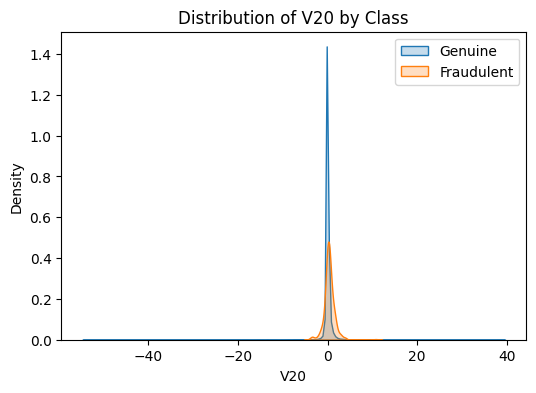

<ipython-input-19-27e9f396a09b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['V'+str(i)], label='Genuine', shade=True)
<ipython-input-19-27e9f396a09b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['V'+str(i)], label='Fraudulent', shade=True)


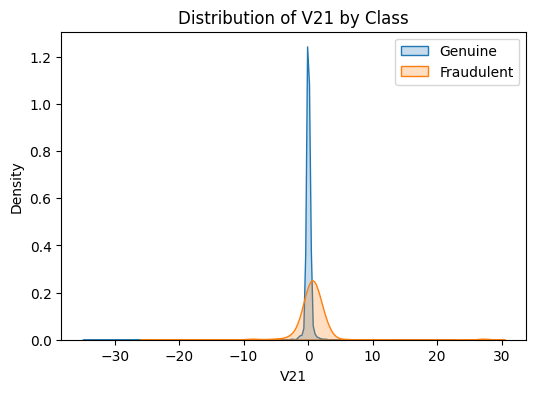

<ipython-input-19-27e9f396a09b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['V'+str(i)], label='Genuine', shade=True)
<ipython-input-19-27e9f396a09b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['V'+str(i)], label='Fraudulent', shade=True)


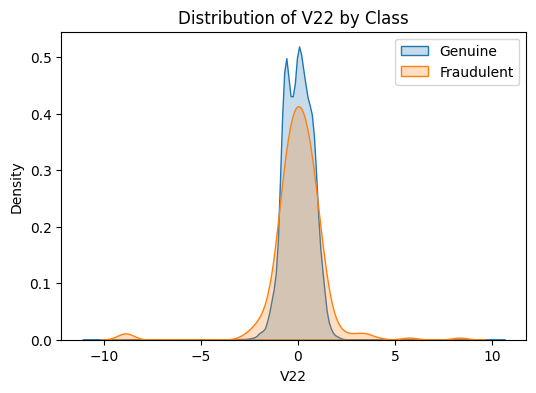

<ipython-input-19-27e9f396a09b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['V'+str(i)], label='Genuine', shade=True)
<ipython-input-19-27e9f396a09b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['V'+str(i)], label='Fraudulent', shade=True)


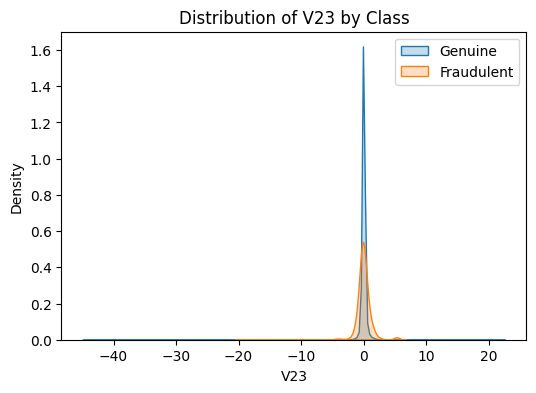

<ipython-input-19-27e9f396a09b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['V'+str(i)], label='Genuine', shade=True)
<ipython-input-19-27e9f396a09b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['V'+str(i)], label='Fraudulent', shade=True)


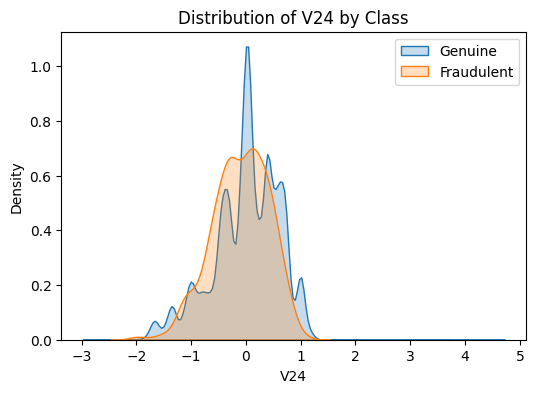

<ipython-input-19-27e9f396a09b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['V'+str(i)], label='Genuine', shade=True)
<ipython-input-19-27e9f396a09b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['V'+str(i)], label='Fraudulent', shade=True)


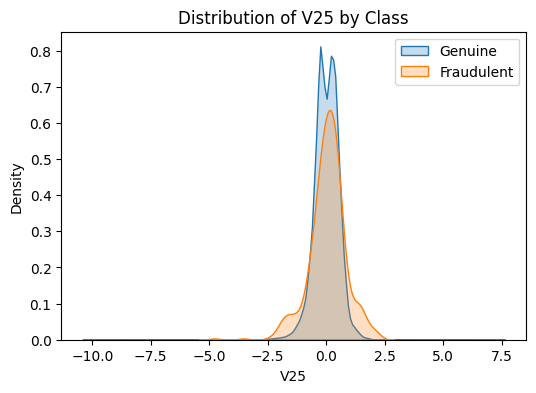

<ipython-input-19-27e9f396a09b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['V'+str(i)], label='Genuine', shade=True)
<ipython-input-19-27e9f396a09b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['V'+str(i)], label='Fraudulent', shade=True)


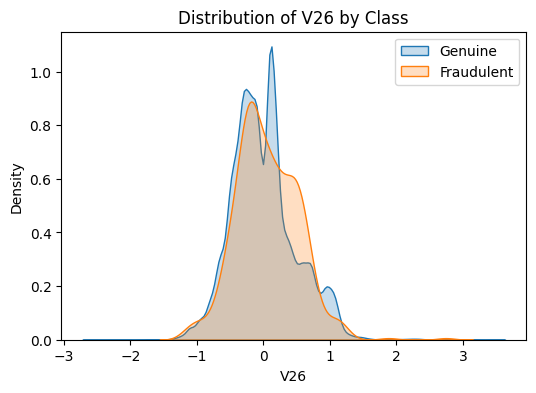

<ipython-input-19-27e9f396a09b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['V'+str(i)], label='Genuine', shade=True)
<ipython-input-19-27e9f396a09b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['V'+str(i)], label='Fraudulent', shade=True)


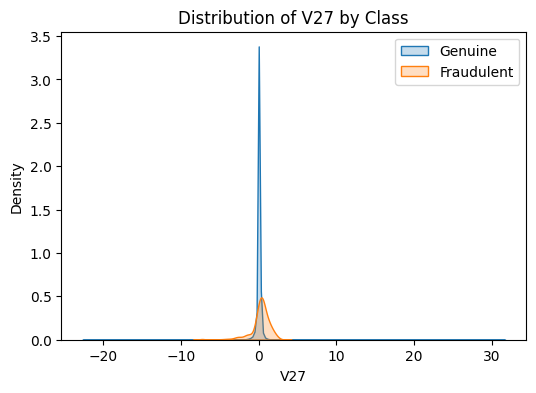

<ipython-input-19-27e9f396a09b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['V'+str(i)], label='Genuine', shade=True)
<ipython-input-19-27e9f396a09b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['V'+str(i)], label='Fraudulent', shade=True)


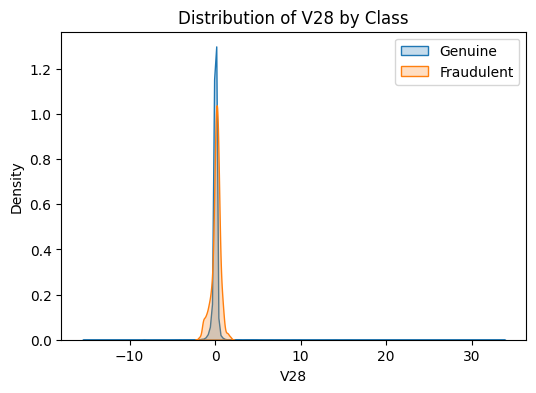

In [19]:
for i in range(1, 29):
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df[df['Class'] == 0]['V'+str(i)], label='Genuine', shade=True)
    sns.kdeplot(df[df['Class'] == 1]['V'+str(i)], label='Fraudulent', shade=True)
    plt.title(f'Distribution of V{i} by Class')
    plt.xlabel(f'V{i}')
    plt.ylabel('Density')
    plt.legend()
    plt.show()


4. Data Preprocessing - Normalization

In [8]:
scaler = StandardScaler()

# Apply Standard Scaler to 'Amount' and 'Time'
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

print(df[['Amount', 'Time']].head())


     Amount      Time
0  0.244964 -1.996583
1 -0.342475 -1.996583
2  1.160686 -1.996562
3  0.140534 -1.996562
4 -0.073403 -1.996541


5. Handling Class Imbalance

In [9]:
# Separate input features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Apply SMOTE to balance the classes
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Check new class distribution
print(pd.Series(y_res).value_counts(normalize=True))


Class
0    0.5
1    0.5
Name: proportion, dtype: float64


6. Splitting the dataset

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 454904
Test set size: 113726


7. Model Training

In [11]:
# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

8. Model Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
[[56739    11]
 [    0 56976]]
Accuracy: 0.9999


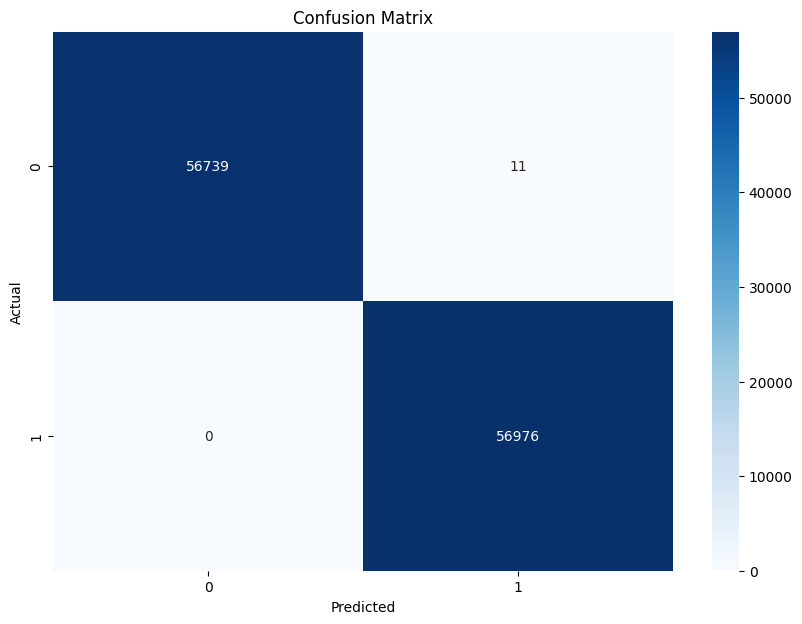

In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Plotting the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
